In [2]:
import cv2
import pandas

import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from constants import *


In [5]:
# get data
train_db = pandas.read_csv(DATASET_PATH / "train.csv")
test_db = pandas.read_csv(DATASET_PATH / "test.csv")

In [7]:
train_db

,emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,50,32,15,11,12,10,10,8,15,...,160,157,156,152,148,151,141,143,136,83
1,0,29,24,29,11,15,22,26,11,7,...,60,109,165,148,75,49,33,15,24,24
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,155,138,98,112,94,97,111,107,101,...,102,97,95,92,94,101,108,111,112,109
4,0,211,215,220,221,219,216,213,210,207,...,171,170,168,162,170,169,160,159,156,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,6,27,26,26,26,27,27,28,28,33,...,49,49,46,45,43,41,39,37,37,36
28705,6,7,6,13,39,76,58,29,21,16,...,136,153,156,159,231,255,255,255,252,255
28706,6,124,129,125,123,129,128,127,128,131,...,144,197,255,248,251,252,250,250,243,251
28707,6,242,242,242,216,110,42,20,41,37,...,145,190,214,227,146,139,149,170,195,203


In [8]:
y_train, x_train = train_db.iloc[:, 0], train_db.iloc[:, 1:]
y_test, x_test = test_db.iloc[:, 0], test_db.iloc[:, 1:]

In [9]:
def to_one_hot_vector(y, size=7):
    arr = np.zeros(size)
    arr[y] = 1
    return arr

In [10]:
x_train = x_train.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)

In [11]:
x_test = x_test.to_numpy()
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

In [12]:
y_train = np.stack(tuple(to_one_hot_vector(y) for y in y_train))
y_test = np.stack(tuple(to_one_hot_vector(y) for y in y_test))

In [13]:
x_train.shape, y_train.shape

((28709, 48, 48, 1), (28709, 7))

In [16]:
from keras.applications import VGG19
from keras.callbacks import ModelCheckpoint

In [17]:
model = VGG19(input_shape=(48, 48, 1), classes=7, pooling='max', weights=None)

In [18]:
model.compile("adam", "categorical_crossentropy")

In [19]:
checkpoint = ModelCheckpoint('best_emotion.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

In [20]:
import tensorflow as tf

tf.config.run_functions_eagerly(True)

In [4]:
from tensorflow.python.keras import backend as K
K._get_available_gpus()

[]

In [30]:
model.fit(x_train, y_train, batch_size=32, epochs=1, verbose=1,
                            callbacks=[checkpoint], validation_data=(x_test, y_test), shuffle=True)

Epoch 1/100


C:\Users\FedeleWu\anaconda3\envs\inner_peace\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


898/898 [==============================] - ETA: 0s - loss: 1.8139
Epoch 1: val_loss improved from inf to 1.81370, saving model to best_emotion.h5
898/898 [==============================] - 1051s 1s/step - loss: 1.8139 - val_loss: 1.8137
Epoch 2/100
 41/898 [>.............................] - ETA: 17:12 - loss: 1.7970

KeyboardInterrupt: 

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=INDEX_TO_EMOTION).plot()
  plt.show()

In [42]:
y_pred = model.predict(x_test)

C:\Users\FedeleWu\anaconda3\envs\inner_peace\lib\site-packages\tensorflow\python\data\ops\structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


 45/225 [=====>........................] - ETA: 1:03

KeyboardInterrupt: 

Plotting the Confusion Matrix


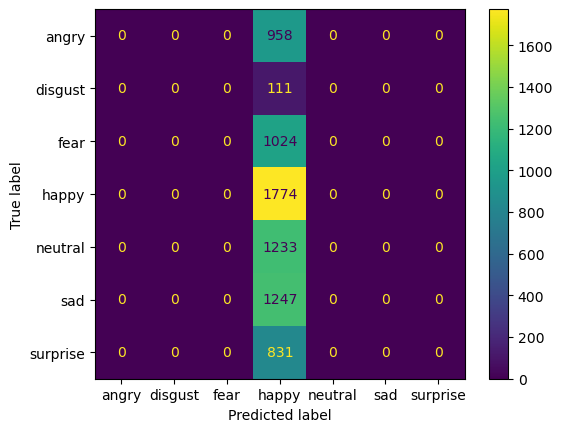

In [45]:
plot_confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

In [1]:
y_pred[0] == y_pred[1]

NameError: name 'y_pred' is not defined